**Random Forest**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
#Load the data
data=pd.read_csv("/content/titanic.csv")
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#A look at the first 5 examples of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#dropping unnecessary features and encoding
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'].astype(str))
data['Embarked']=le.fit_transform(data['Embarked'].astype(str))
data.drop(['PassengerId'],axis=1,inplace=True)
data.drop(['Name'],axis=1,inplace=True)
data.drop(['Ticket'],axis=1,inplace=True)
data.drop(['Cabin'],axis=1,inplace=True)
data.drop(['Age'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,2
1,1,1,0,1,0,71.2833,0
2,1,3,0,0,0,7.9250,2
3,1,1,0,1,0,53.1000,2
4,0,3,1,0,0,8.0500,2


In [5]:
#Divide the dataset into features and target variables
X=data.iloc[:,1:]
Y=data['Survived'].ravel()

#Divide the dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [6]:
#Fit the training data into the Random Forest Classifier
model=RandomForestClassifier().fit(X_train, Y_train)
predict = model.predict(X_test)

In [7]:
print("Efficiency is :")
print(accuracy_score(predict, Y_test)*100)

Efficiency is :
84.30493273542601


**Regression Using SKLearn**

In [9]:
import csv

csv_file = "/content/titanic.csv"

txt_file = "titanic.txt"

with open(csv_file, 'r') as csv_file:
    with open(txt_file, 'w') as txt_file:
        csv_reader = csv.reader(csv_file)

        for row in csv_reader:

            txt_file.write(','.join(row) + '\n')

In [8]:
#upload necessary libraries that will be used
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import random

In [19]:
import numpy as np
data = np.genfromtxt('/titanic.txt', delimiter=',', skip_header=1)

X = data[:, 0:-1]

Y = data[:, -1]

In [20]:
h = .02

logreg = linear_model.LogisticRegression(C=1e3)

In [21]:
logreg.fit(X, Y)

#Finding the maximum and minimum of x's and y's to limit the size of the plot
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#convert all the input-output from a matrix to a single array
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

(30.10326323428011, 99.36326323427863)

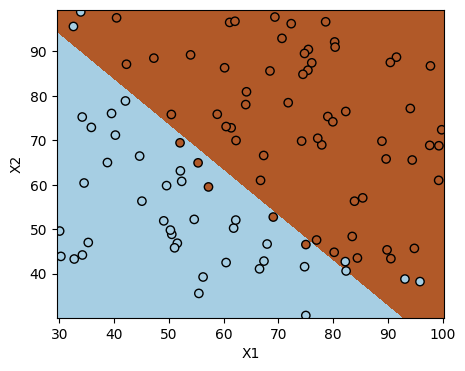

In [22]:
#Create a figure of specified size and in a colour plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plotting the data points provided and setting the limits of the graph
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [23]:
#testing the data for some random value of the train data
random_data=random.randint(0,len(Y))
prediction=logreg.predict(X[random_data:random_data+1,:])
if prediction==Y[random_data]:
    print("Successful")
else:
    print("Not Successful")

Successful
